# List 8


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

from perceptron import Perceptron
from adalineGD import AdalineGD
from adalineSGD import AdalineSGD

## Read Data


In [2]:
df = pd.read_csv('../datasets/pima-indians-diabetes.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corrwith(df[8])

0    0.221898
1    0.466581
2    0.065068
3    0.074752
4    0.130548
5    0.292695
6    0.173844
7    0.238356
8    1.000000
dtype: float64

In [27]:
X = df[[1, 5]] # 2 atributo de maior correlacao
y = df[8]

In [28]:
X = np.array(X)
X

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       ...,
       [121. ,  26.2],
       [126. ,  30.1],
       [ 93. ,  30.4]])

In [29]:
scaler = StandardScaler().fit(X)

In [30]:
X_transf = scaler.transform(X)

## Decision Regions

In [31]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Perceptron

In [37]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [38]:
ppn.fit(X_transf, y)

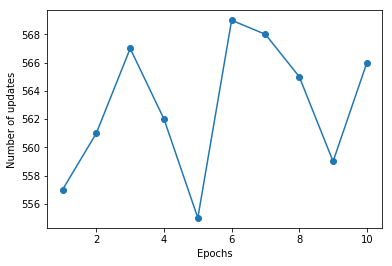

In [39]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

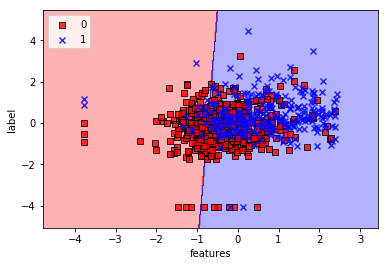

In [40]:
plot_decision_regions(X_transf, y, classifier=ppn)
plt.xlabel('features')
plt.ylabel('label')
plt.legend(loc='upper left')

plt.show()


## Adaline GD

In [41]:
ada = AdalineGD(n_iter=15, eta=0.01)

In [42]:
ada.fit(X_transf, y)

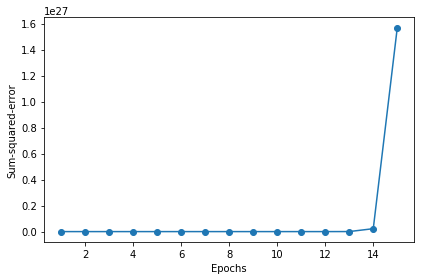

In [43]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

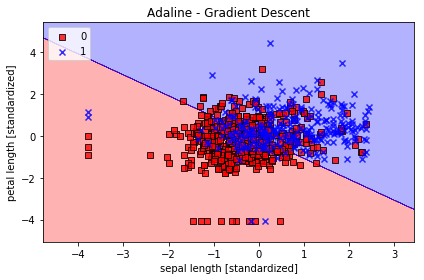

In [44]:
plot_decision_regions(X_transf, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

## Adaline SGD

In [45]:
adas = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
adas.fit(X_transf, y)

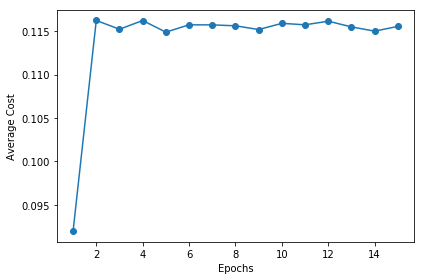

In [47]:
plt.plot(range(1, len(adas.cost_) + 1), adas.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

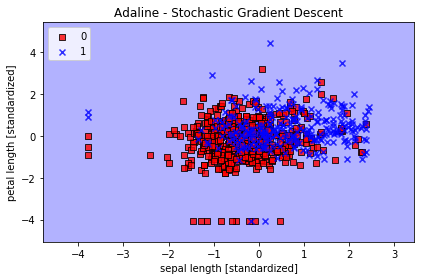

In [49]:
plot_decision_regions(X_transf, y, classifier=adas)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()